For more information on the dataset, visit the https://scikit-learn.org/stable/datasets/real_world.html#newsgroups-dataset

In [1]:
import zipfile
import os
import librosa
import pandas as pd
import numpy as np
import shutil
import matplotlib.pyplot as plt
import keras

In [2]:
!pip install numpy matplotlib scikit-learn

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Step 1: Load the dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
documents = newsgroups.data

In [4]:
# Step 2: Preprocess and vectorize the documents
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5, min_df=2)
X = vectorizer.fit_transform(documents)

In [5]:
# Step 3: Perform KMeans clustering
true_k = 10  # Number of clusters
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(max_iter=100, n_clusters=10, n_init=1)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [6]:
# Step 4: Visualize the clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

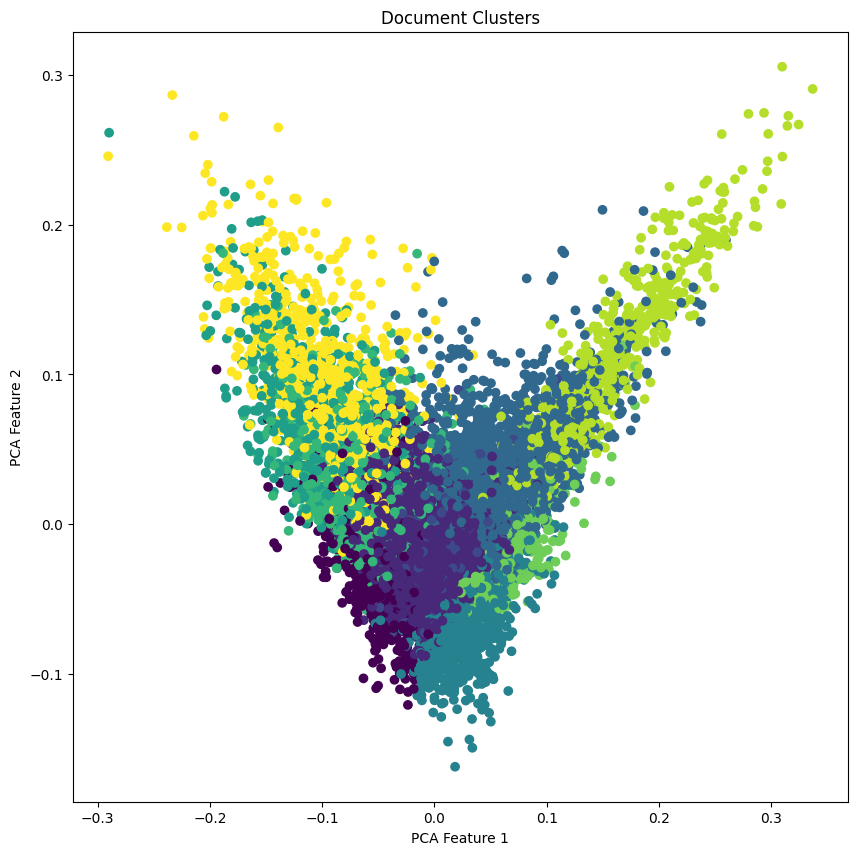

In [7]:
plt.figure(figsize=(10, 10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=model.labels_)
plt.title('Document Clusters')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()